<a href="https://colab.research.google.com/github/habroland/Blog/blob/master/EquivalentLens/EquivalentLensCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equivalent-lens system for an array of lenses. Check this <a href="https://underthemath.wordpress.com/2020/05/31/equivalent-lens-system/">blog</a> for details.

# Functions

In [1]:
def equivSingleLens_2lenses(f1,d12,f2):
    """ Calculates the equivalent single-lens system for an array of two lenses
    
    Arguments:
    f1: Focal length of the first lens
    d12: Distance between the lenses
    f2: Focal length of second lens
    
    Returns:
    df: Front distance
    feff: Effective focal length
    db: Back distance
    
    """
    df = (d12*f1)/(f1+f2-d12)
    feff = (f2*f1)/(f1+f2-d12)
    db = (d12*f2)/(f1+f2-d12)
    
    return df, feff, db

def equivSingleLens(fls,ds):
    """ Calculates the equivalent single-lens system for an array of lenses
    
    Arguments:
    fls: List of N focal lengths
    ds: List of N-1 distances, each one between lenses f_i and f_(i+1)
    
    Returns: Dictionary
    df: Front distance
    feff: Effective focal length
    db: Back distance
    
    """
    assert(len(fls) == len(ds)+1)
    
    df = 0
    feff = fls[0]
    db = 0
    for i in range(len(ds)):
        df_temp, feff, db = equivSingleLens_2lenses(feff,db+ds[i],fls[i+1])
        df += df_temp
    
    return {"df":df, "feff":feff, "db":db}

# Results

In [2]:
from sympy import *
init_printing()

## Variables

Four lenses, and the distances between consecutive pairs

In [3]:
F1, F2, F3, F4 = symbols('F1 F2 F3 F4')
D12, D23, D34 = symbols('D12 D23 D34')

## Testing functions

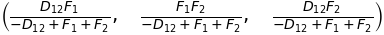

In [4]:
equivSingleLens_2lenses(F1,D12,F2)

In [5]:
equivSingleLens([F1,F2],[D12])

{'db': D12*F2/(-D12 + F1 + F2),
 'df': D12*F1/(-D12 + F1 + F2),
 'feff': F1*F2/(-D12 + F1 + F2)}

In [6]:
expand(simplify(1/(equivSingleLens([F1,F2],[D12])['feff'])))

## Compute 1/f3L

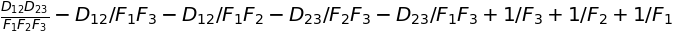

In [7]:
expand(simplify(1/(equivSingleLens([F1,F2,F3],[D12,D23])['feff'])))

## Compute 1/f4L

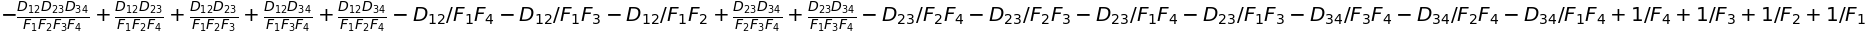

In [ ]:
f4L_inv=expand(simplify(1/(equivSingleLens([F1,F2,F3,F4],[D12,D23,D34])['feff'])))
f4L_inv

Do you see a pattern?

The last terms are the reciprocals of each focal length

The first term is the product of the distances divided by the product of the focal lengths, with a minus sign for an even number of lenses.

### Compute 1/f4L in a different way

The first two and the last two lenses can be separately substituted by their equivalent lens system. The resulting two equivalent lenses with the corresponding separation can be once again merged into one effective lens, as given in the formula of the blog post.

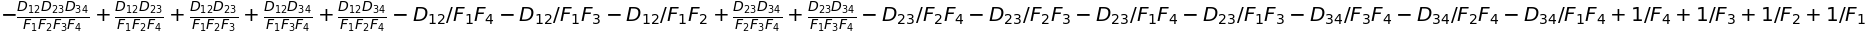

In [ ]:
_, Feff12, DB12 = equivSingleLens_2lenses(F1,D12,F2)
DF34, Feff34, _ = equivSingleLens_2lenses(F3,D34,F4)
_, Feff1234, _ = equivSingleLens_2lenses(Feff12,DB12+D23+DF34,Feff34)
expand(simplify(1/Feff1234))

Make sure the two expressions are the same.

In [ ]:
simplify(f4L_inv - 1/Feff1234)

# Numerical examples

You have to use consistent units for all parameters

db can be larger than the effective focal length feff. In this case, an incident collimated beam would have a focal point that can't be accessed physically

In [ ]:
equivSingleLens([100,50,75,150],[10,15,20])

{'db': 36.59127625201939, 'df': 21.43241787829833, 'feff': 30.290791599353792}

Any parameter can be negative. In the equivalent system, a free-space propagation distance can be a negative value. This is effectively the same as a leap backwards from the beam propagation direction.

In [ ]:
equivSingleLens([100,-50,75],[10,15])

{'db': -3.5714285714285716,
 'df': 30.952380952380953,
 'feff': 178.57142857142858}

Concatenated telescopes: Two telescopes. "eps" is a dummy variable to avoid infinity in the symbolic calculation. It should be set to 0 at the end.

In [24]:
eps = symbols('eps')

In [27]:
expand(simplify(1/(equivSingleLens([F1,F2,F3],[F1+F2+eps,F2+F3+eps])['feff']))).subs(eps,0)